In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Load Data
df=pd.read_csv("/content/drive/MyDrive/MSD527_Assignment/ElectronMobility.csv")

In [ ]:
df.head()

,Mobility,Density Ln
0,80.574,-3.067
1,84.248,-2.981
2,87.264,-2.921
3,87.195,-2.912
4,89.076,-2.840


In [ ]:
df.shape

(37, 2)

In [ ]:
X=df["Mobility"].values

In [ ]:
y=df["Density Ln"].values

In [ ]:
#correlation coefficient
corr= df.corr()
corr

,Mobility,Density Ln
Mobility,1.000000,0.959695
Density Ln,0.959695,1.000000


In [ ]:
df.describe()

,Mobility,Density Ln
count,37.000000,37.000000
mean,783.210108,-0.863027
std,564.348738,1.608668
min,80.574000,-3.067000
25%,95.854000,-2.481000
50%,894.206000,-0.915000
75%,1327.543000,0.119000
max,1468.705000,2.200000


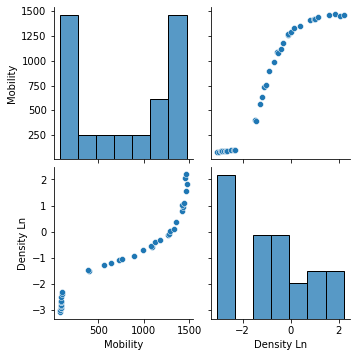

In [ ]:
sns.pairplot(df)

In [ ]:
X=X.reshape(len(X),1)
y=y.reshape(len(X),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

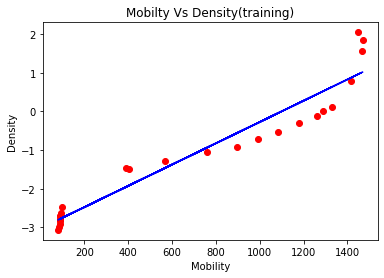

In [ ]:
#visualising training data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Mobilty Vs Density(training)')
plt.xlabel('Mobility')
plt.ylabel('Density')
plt.show()

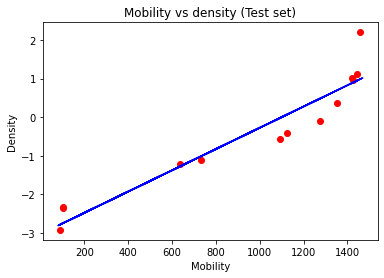

In [ ]:
# visualizing the test data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Mobility vs density (Test set)')
plt.xlabel('Mobility')
plt.ylabel('Density')
plt.show()

In [ ]:
#R Squared Value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9010822395958412

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.00275409]]
[-3.02888423]


In [ ]:
#coefficent of simple linear regression
m=regressor.coef_[0]
c=regressor.intercept_
print("Equation of Predicted Line: ")
print("Density = Mobility*{}+{}".format(m,c))

Equation of Predicted Line: 
Density = Mobility*[0.00275409]+[-3.02888423]


In [ ]:
# using polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


LinearRegression()

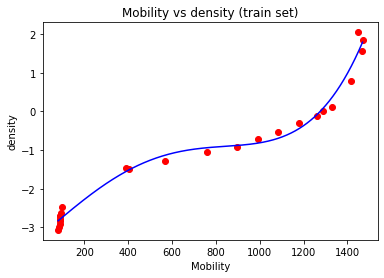

In [ ]:
#Visualising the train data
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Mobility vs density (train set)')
plt.xlabel('Mobility')
plt.ylabel('density')
plt.show()

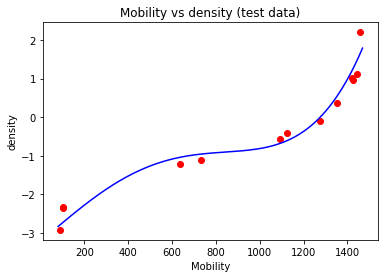

In [ ]:
#visualizing the test data
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Mobility vs density (test data)')
plt.xlabel('Mobility')
plt.ylabel('density')
plt.show()

In [ ]:
y_pred_poly=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [ ]:
#R Squared Value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.9640960069217953

In [ ]:
print(lin_reg_2.coef_)


[[ 0.00000000e+00  4.65729849e-03  1.50544565e-06 -8.37334672e-09
   4.60763979e-12]]


In [ ]:
m=lin_reg_2.coef_[0]

print("Equation of Predicted curve: ")
print("Density ={}+{}x+{}x^2+{}x^3+{}x^4".format(m[0],m[1],m[2],m[3],m[4]))

Equation of Predicted curve: 
Density =0.0+0.004657298485121575x+1.5054456468964033e-06x^2+-8.373346721832878e-09x^3+4.607639790543683e-12x^4
